# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Run a complete regression analysis using python

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [8]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 
import numpy as np
X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

Slope: 0.5575757575757568
Intercept: 6.3333333333333375
R-Squared: 0.9715335169880626
Model: Y = 0.5575757575757568 * X + 6.3333333333333375


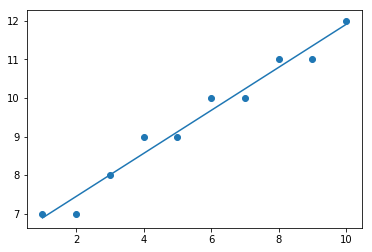

In [9]:
import matplotlib.pyplot as plt

def calc_slope(xs,ys):
    num = np.mean(xs) * np.mean(ys) - np.mean(xs * ys)
    den = np.mean(xs)**2 - np.mean(np.square(xs))
    return num / den

def best_fit(xs,ys):
    m = calc_slope(xs, ys)
    c = np.mean(ys) - m * np.mean(xs)
    return m, c

m, c = best_fit(X,Y)

print("Slope: " + str(m))

print("Intercept: " + str(c))

def reg_line (m, c, xs):
    return m*np.array(xs) + c

regression_line = reg_line(m,c,X)

plt.scatter(X,Y)
plt.plot(X, regression_line)

def sq_err(y_a, y_b):
    """
    input
    y_a : true y values
    y_b : regression line 
    return
    squared error between regression and true line (ss_tot)
    """
    return np.sum(np.square(y_a-y_b))

def r_squared(y_real, y_predicted):
    """
    input
    y_real: real values
    y_predicted: regression values
    return
    r_squared value
    """
    y_bar = np.mean(y_real)
    SSE = sq_err(y_real, y_predicted)
    SST = sq_err(y_real, y_bar)
    return 1 - SSE/SST

# Check the output with some toy data
Y_pred = regression_line

print("R-Squared: " + str(r_squared(Y, Y_pred)))

print("Model: Y = " + str(m) + " * X + " + str(c))

# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

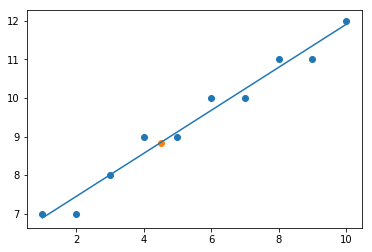

In [10]:
# Make prediction for x = 4.5 and visualize on the scatter plot
yhat = reg_line(m, c, 4.5)

plt.scatter(X,Y)
plt.plot(X, regression_line)
plt.scatter(4.5,yhat)

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use python's built-in modules to perform similar analyses with a much higher level of sophistication. 

Slope: 0.17246914818902498
Intercept: 38.25461523025965
R-Squared: 0.9553099288673668
Model: Y = 0.17246914818902498 * X + 38.25461523025965


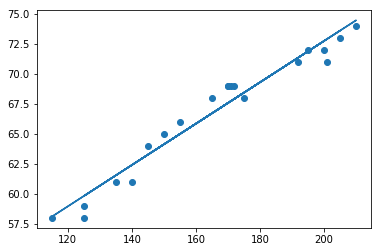

In [11]:
import pandas as pd
df  = pd.read_csv('heightWeight.csv')
X = df["weight"]
Y = df["height"]

m, c = best_fit(X,Y)

print("Slope: " + str(m))

print("Intercept: " + str(c))

regression_line = reg_line(m,c,X)

plt.scatter(X,Y)
plt.plot(X, regression_line)

Y_pred = regression_line

print("R-Squared: " + str(r_squared(Y, Y_pred)))

print("Model: Y = " + str(m) + " * X + " + str(c))

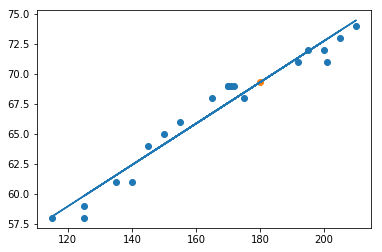

In [12]:
yhat = reg_line(m, c, 180)

plt.scatter(X,Y)
plt.plot(X, regression_line)
plt.scatter(180,yhat)